In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part A

We have

$$\begin{pmatrix} dp_1' \\ dq_1' \\ \end{pmatrix} = \begin{pmatrix} \frac{\partial p_1'}{\partial p_1} & \frac{\partial p_1'}{\partial q_1} \\ \frac{\partial q_1'}{\partial p_1} & \frac{\partial q_1'}{\partial q_1} \\ \end{pmatrix} \begin{pmatrix} dp_1 \\ dq_1 \\ \end{pmatrix} $$

Noting that

$$\begin{pmatrix} \frac{\partial p_1'}{\partial p_1} & \frac{\partial p_1'}{\partial q_1} \\ \frac{\partial q_1'}{\partial p_1} & \frac{\partial q_1'}{\partial q_1} \\ \end{pmatrix} = \begin{pmatrix} 1 & \epsilon \cos q \\ 1 & 1+\epsilon \cos q  \\ \end{pmatrix} $$

We see that the determinnant of the matrix is 1:

$$(1+\epsilon\ \cos q)-\epsilon \cos q = 1 $$

Implying that the map is volume-preserving.

## Part B and C Preparation

Used to execute the mapping.

In [2]:
eps = 1

def chirikov(pnt):
    x = pnt[0]; y = pnt[1]
    x_new = (x + eps*np.sin(y)) % (2*np.pi)
    y_new = (x + y + eps*np.sin(y)) % (2*np.pi)
    return (x_new, y_new)

Used to generate arrays of $p$ values and $q$ values based on the mapping above. In other words, generates two arrays

$$\vec{p} = (p, p', p'', ..., p^{(n)}) $$
$$\vec{q} = (q, q', q'', ..., q^{(n)}) $$

which can then be easily plotted. $n$ is equal to the parameter "**size**" defined below.

In [3]:
size = 200

def get_pnt_array(pnt):
    arr = np.zeros((size, 2), dtype=(float, float))
    for i in range(size):
        arr[i] = pnt
        pnt = chirikov(pnt)
    return (np.array(list(zip(*arr))[0]), np.array(list(zip(*arr))[1]))

Generates an array of points to try. In particular, this array of points is 40x40 and spans the range (0, 2$\pi$) in both the $x$ and $y$ directions.

In [4]:
dims = np.linspace(0, 2*np.pi, 40)
pnts = np.array([(i, j) for i in dims for j in dims])

## Part B

Lets set $\epsilon$ small and plot.

In [5]:
eps = 0.01

We'll start with a few sample points.

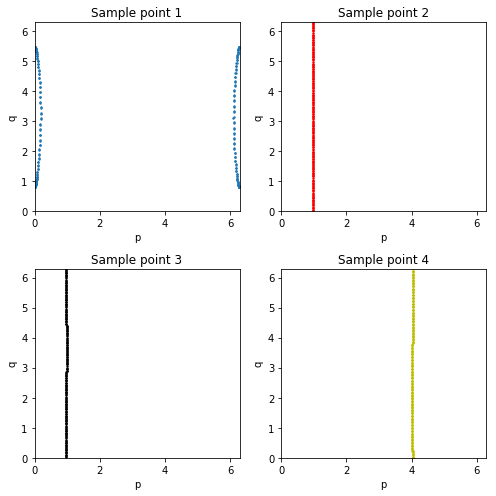

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(7,7))

[a.set_xlim(0, 2*np.pi) for a in ax.ravel()]
[a.set_ylim(0, 2*np.pi) for a in ax.ravel()]
[a.set_xlabel('p') for a in ax.ravel()]
[a.set_ylabel('q') for a in ax.ravel()]

arr = get_pnt_array(pnts[5])
ax[0][0].scatter(arr[0], arr[1], s=2)
ax[0][0].set_title('Sample point 1')

arr = get_pnt_array(pnts[250])
ax[0][1].scatter(arr[0], arr[1], s=2, c='r')
ax[0][1].set_title('Sample point 2')

arr = get_pnt_array(pnts[250])
ax[1][0].scatter(arr[0], arr[1], s=2, c='k')
ax[1][0].set_title('Sample point 3')

arr = get_pnt_array(pnts[1000])
ax[1][1].scatter(arr[0], arr[1], s=2, c='y')
ax[1][1].set_title('Sample point 4')

fig.tight_layout()
plt.show()

They appear to move in "straight-ish" lines. This suggests that they do not cover all of phase space with the mapping. Lets see what the mapping looks like for a lot of points.

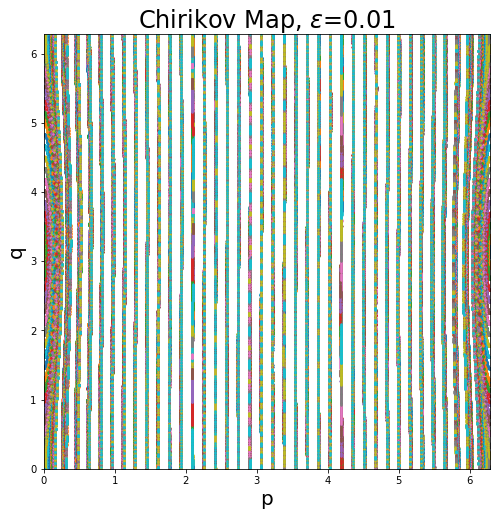

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(0, 2*np.pi)

for p in pnts:
    arr = get_pnt_array(p)
    ax.scatter(arr[0], arr[1], s=2)
    
ax.set_xlabel('p', fontsize=20)
ax.set_ylabel('q', fontsize=20)
ax.set_title(r'Chirikov Map, $\epsilon$={}'.format(eps), fontsize=24)

plt.show()

**It appears that a given point $(p_0, q_0)$ will not be mapped to all of the phase space.** They appear to stay moving in lines. 

## Part C

Lets set $\epsilon$ large and plot.

In [8]:
eps = 1000

We'll start with a few sample points

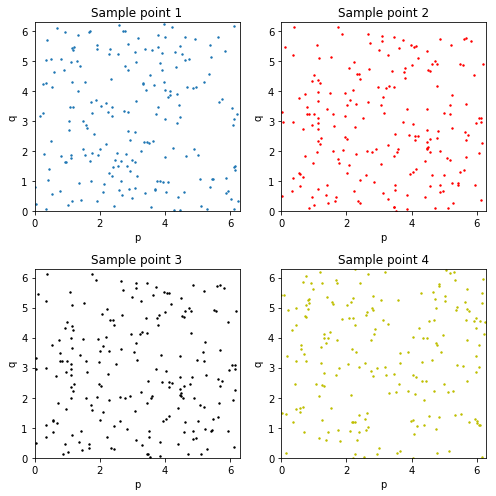

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(7,7))

[a.set_xlim(0, 2*np.pi) for a in ax.ravel()]
[a.set_ylim(0, 2*np.pi) for a in ax.ravel()]
[a.set_xlabel('p') for a in ax.ravel()]
[a.set_ylabel('q') for a in ax.ravel()]

arr = get_pnt_array(pnts[5])
ax[0][0].scatter(arr[0], arr[1], s=2)
ax[0][0].set_title('Sample point 1')

arr = get_pnt_array(pnts[250])
ax[0][1].scatter(arr[0], arr[1], s=2, c='r')
ax[0][1].set_title('Sample point 2')

arr = get_pnt_array(pnts[250])
ax[1][0].scatter(arr[0], arr[1], s=2, c='k')
ax[1][0].set_title('Sample point 3')

arr = get_pnt_array(pnts[1000])
ax[1][1].scatter(arr[0], arr[1], s=2, c='y')
ax[1][1].set_title('Sample point 4')

fig.tight_layout()
plt.show()

They appear to get mapped everywhere. Lets try it for all the points.

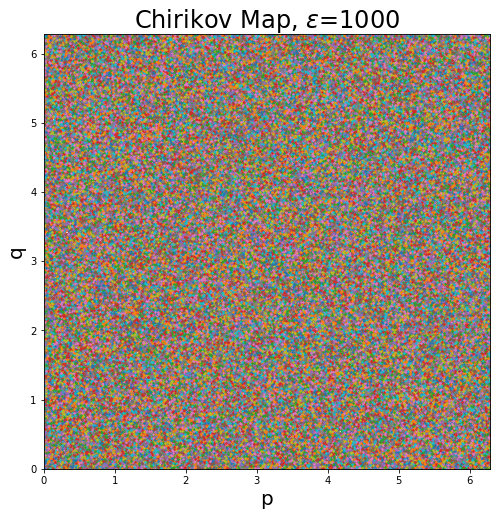

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(0, 2*np.pi)

for p in pnts:
    arr = get_pnt_array(p)
    ax.scatter(arr[0], arr[1], s=2)
    
ax.set_xlabel('p', fontsize=20)
ax.set_ylabel('q', fontsize=20)
ax.set_title(r'Chirikov Map, $\epsilon$={}'.format(eps), fontsize=24)

plt.show()

**It appears that a given point $(p_0, q_0)$ will be mapped to all of the phase space.**

## For Fun

In [11]:
eps = 1

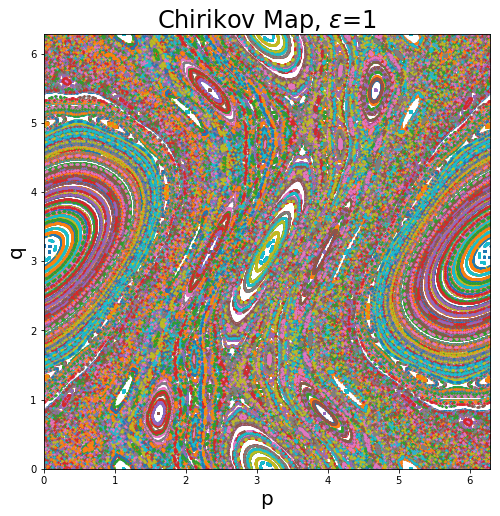

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(0, 2*np.pi)

for p in pnts:
    arr = get_pnt_array(p)
    ax.scatter(arr[0], arr[1], s=2)
    
ax.set_xlabel('p', fontsize=20)
ax.set_ylabel('q', fontsize=20)
ax.set_title(r'Chirikov Map, $\epsilon$={}'.format(eps), fontsize=24)

plt.show()

Fancy looking.